# Final Project
Albert Xu & Regina Zbarskaya

We are using the wine quality dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. Our goal is to be able to predict whether a wine is red or white based on its properties. The models we use are Logistic Regression, SVM, and Neural Net. We also played with PCA.

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition.pca import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

/Users/albertxu/Documents/nyu/sophomore/machine_learning_hw/mlenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import data into dataframes 
df1 = pd.read_csv('winequality-red.csv', delimiter=';')
df2 = pd.read_csv('winequality-white.csv', delimiter=';')

# place values into arrays 
red = df1.values
white = df2.values
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [3]:
# Create column of ones for red and column of zeros for white 
red = np.hstack((df1.values, np.ones((red.shape[0], 1))))
white = np.hstack((df2.values, np.zeros((white.shape[0], 1))))

# Combine both red and white arrays into one final array 
X = np.vstack((red, white))

# Separate y from x by using last column of 1s/0s to indicate red/white 
X, y = X[:,:-1], X[:,-1]

# Split data randomly into (approximately) equal arrays of training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print("Training size: %d examples" % len(y_train))
print("Test size: %d examples" % len(y_test))

Training size: 3248 examples
Test size: 3249 examples


# Logistic Regression


Lasso (L1) Regularization: 
	Training Accuracy: 98.34%
	Test Accuracy: 98.40%

Ridge (L2) Regularization: 
	Training Accuracy: 98.03%
	Test Accuracy: 98.00%


(0.9, 1)

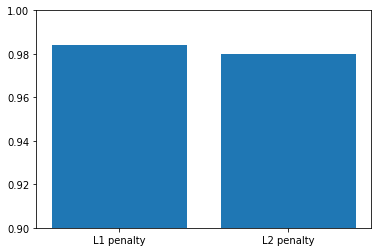

In [4]:
# Apply logistic regression on data to predict red/white wine 
def logreg_acc(penalty, X_train, X_test, y_train, y_test, debug=False):
    logreg = LogisticRegression(penalty=penalty)
    logreg.fit(X_train, y_train)
    tr_acc = logreg.score(X_train, y_train)
    ts_acc = logreg.score(X_test, y_test)
    if debug:
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc*100))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc*100))
    return tr_acc, ts_acc
    
ts_acc = []
# ---------- Lasso (L1) Regularization ----------
print('\nLasso (L1) Regularization: ')
ts_acc.append(logreg_acc('l1', X_train, X_test, y_train, y_test, debug=True)[1])

# ---------- Ridge (L2) Regularization ----------
print('\nRidge (L2) Regularization: ')
ts_acc.append(logreg_acc('l2', X_train, X_test, y_train, y_test, debug=True)[1])

plt.bar(range(2), ts_acc)
plt.xticks(range(2), ['L1 penalty', 'L2 penalty'])
plt.ylim(0.9, 1)


(2) Poly Feature Transformation, Lasso (L1) Regularization: 
	Training Accuracy: 99.05%
	Test Accuracy: 98.80%

(2) Poly Feature Transformation, Ridge (L2) Regularization: 
	Training Accuracy: 98.74%
	Test Accuracy: 98.52%

(3) Poly Feature Transformation, Lasso (L1) Regularization: 
	Training Accuracy: 99.66%
	Test Accuracy: 99.11%

(3) Poly Feature Transformation, Ridge (L2) Regularization: 
	Training Accuracy: 97.17%
	Test Accuracy: 97.48%
[0.9879963065558633, 0.9852262234533703, 0.9910741766697445, 0.9747614650661742]


(0.9, 1)

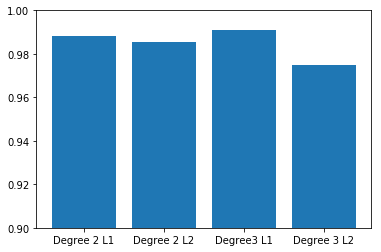

In [5]:
# ---------- Polynomial Feature Transformation (2, 3) ----------
def poly_t(feat, model):
    poly = PolynomialFeatures(feat)
    # Create the transformed data matrices for training and test using poly.fit_transform(..)
    X_transformed_train = poly.fit_transform(X_train)
    X_transformed_test = poly.fit_transform(X_test)
    return logreg_acc(model, X_transformed_train, X_transformed_test, y_train, y_test, debug=True)

ts_acc = []
# Perform logistic regression with both regularizations
for i in range(2,4):
    print('\n({0}) Poly Feature Transformation, Lasso (L1) Regularization: '.format(i))
    ts_acc.append(poly_t(i, 'l1')[1])
    print('\n({0}) Poly Feature Transformation, Ridge (L2) Regularization: '.format(i))
    ts_acc.append(poly_t(i, 'l2')[1])
print(ts_acc)
plt.bar(range(4), ts_acc)
plt.xticks(range(4), ['Degree 2 L1', 'Degree 2 L2', 'Degree3 L1', 'Degree 3 L2'])
plt.ylim(0.9, 1)

### Logistic with PCA

Text(0,0.5,'Test Accuracy')

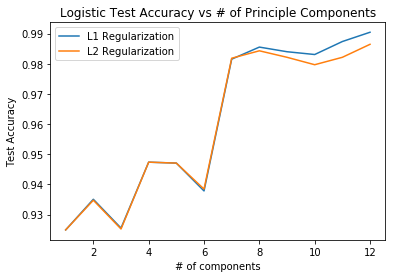

In [6]:
# ---------- Changing Number of Principle Components (Logistic) ----------
def pca_transform(X, n_components):
    pca = PCA(n_components)
    pca.fit(X)
    return pca.transform(X)

# create arrays to hold test accuracy 
test_acc1 = []
test_acc2 = []
for i in range(1, 13):
    # split original x array based on n components 
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    # fit using l1 regularization 
    acc = logreg_acc('l1', X2_train, X2_test, Y2_train, Y2_test)
    test_acc1.append(acc[1])
    # fit using l2 regularization 
    acc = logreg_acc('l2', X2_train, X2_test, Y2_train, Y2_test)
    test_acc2.append(acc[1])

# plot both regularizations on one graph 
l1, = plt.plot(range(1, 13), test_acc1, label='L1 Regularization')
l2, = plt.plot(range(1,13), test_acc2, label='L2 Regularization')
plt.legend(handles=[l1, l2])
plt.title('Logistic Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

# Support Vector Machines (SVM)

### LinearSVM


Lasso (L1) Regularization: 
	Training Accuracy: 98.68%
	Test Accuracy: 98.80%

Ridge (L2) Regularization: 
	Training Accuracy: 98.80%
	Test Accuracy: 98.77%


(0.9, 1)

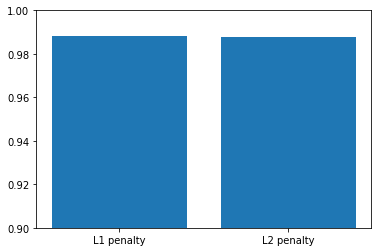

In [7]:
# Apply linear SVM to on data to predict red/white wine 
def svm_linear_acc(penalty, X_train, X_test, y_train, y_test, debug=False):
    model = LinearSVC(penalty=penalty, loss='squared_hinge', dual=False)
    model.fit(X_train, y_train)
    tr_acc = model.score(X_train, y_train)
    ts_acc = model.score(X_test, y_test)
    if debug:
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc*100))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc*100))
    return tr_acc, ts_acc


ts_acc = []
# ---------- Lasso (L1) Regularization ----------
print('\nLasso (L1) Regularization: ')
ts_acc.append(svm_linear_acc('l1', X_train, X_test, y_train, y_test, debug=True)[1])

# ---------- Ridge (L2) Regularization ----------
print('\nRidge (L2) Regularization: ')
ts_acc.append(svm_linear_acc('l2', X_train, X_test, y_train, y_test, debug=True)[1])

plt.bar(range(2), ts_acc)
plt.xticks(range(2), ['L1 penalty', 'L2 penalty'])
plt.ylim(0.9, 1)

### SVM with PCA

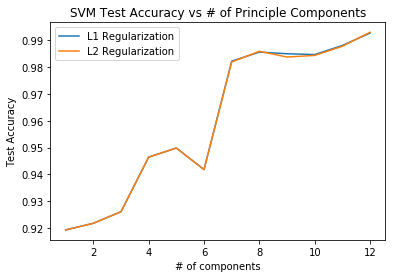

In [8]:
# ---------- Changing Number of Principle Components for LinearSVC ----------
# create arrays to hold test accuracy 
test_acc1 = []
test_acc2 = []
for i in range(1, 13):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    # fit using l1 regularization 
    test_acc1.append(svm_linear_acc('l1', X2_train, X2_test, Y2_train, Y2_test)[1])
    # fit using l2 regularization 
    test_acc2.append(svm_linear_acc('l2', X2_train, X2_test, Y2_train, Y2_test)[1])

# plot both regularizations on one graph 
l1, = plt.plot(range(1, 13), test_acc1, label='L1 Regularization')
plt.title('SVM Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

l2, = plt.plot(range(1,13), test_acc2, label='L2 Regularization')
plt.legend(handles=[l1, l2])

### PCA for different SVM kernels

In [9]:
# Apply different SVM kernels to predict red/white wine 
def svm_acc(kernel, X_train, X_test, y_train, y_test, debug=False):
    model = svm.SVC(probability=False,kernel=kernel)
    model.fit(X_train, y_train)
    # Calculate accuracy 
    tr_acc = model.score(X_train, y_train)
    ts_acc = model.score(X_test, y_test)
    if debug:
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc*100))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc*100))
    return tr_acc, ts_acc

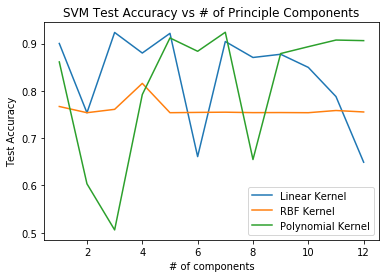

In [10]:
# ---------- Changing Number of Principle Components for SVM ----------
# create arrays to hold test accuracy 
test_acc1 = []
test_acc2 = []
test_acc3 = [] 
for i in range(1, 13):
    #print('Run {0}'.format(i))
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.998)
    #print('\t Linear Kernel')
    # fit using linear kernel
    test_acc1.append(svm_acc('linear', X2_train, X2_test, Y2_train, Y2_test)[1])
    #print('\t RBF Kernel')
    # fit using rbf kernel
    test_acc2.append(svm_acc('rbf', X2_train, X2_test, Y2_train, Y2_test)[1])
    
for i in range(1, 13):
    #print('Run {0}'.format(i))
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.998)
    #print('\t Polynomial Kernel ')
    # fit using polynomial kernel 
    test_acc3.append(svm_acc('poly', X2_train, X2_test, Y2_train, Y2_test)[1])

# plot all three kernels on one graph 
l1, = plt.plot(range(1, 13), test_acc1, label='Linear Kernel')
plt.title('SVM Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

l2, = plt.plot(range(1,13), test_acc2, label='RBF Kernel')
l3, = plt.plot(range(1,13), test_acc3, label='Polynomial Kernel')
plt.legend(handles=[l1, l2, l3])

# Neural Network

In [11]:
# Set up callback class 
class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []
 
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.acc.append(logs.get('acc'))

# neural function
def neural_mod(act, opt):
    # Clear session 
    keras.backend.clear_session()

    # Create new history 
    cb = AccHistory()
    
    # Create model
    model = Sequential()
    model.add(Dense(10, activation=act, input_dim=12))
    model.add(Dense(1, activation=act))

    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),  callbacks=[cb])
    return model, cb.loss, cb.acc

In [12]:
# Running neural network on different types of activation but with the sgd optimizer 
sig, sig_loss, sig_acc = neural_mod('sigmoid', 'sgd')
sig_val = sig.test_on_batch(X_test, y_test)
relu, relu_loss, relu_acc = neural_mod('relu', 'sgd')
relu_val = relu.test_on_batch(X_test, y_test)
tanh, tanh_loss, tanh_acc = neural_mod('tanh', 'sgd')
tanh_val = tanh.test_on_batch(X_test, y_test)

Train on 3248 samples, validate on 3249 samples
Epoch 1/30
3248/3248 [==============================] - 0s 108us/step - loss: 0.1689 - acc: 0.7577 - val_loss: 0.1380 - val_acc: 0.8101
Epoch 2/30
3248/3248 [==============================] - 0s 66us/step - loss: 0.1360 - acc: 0.8319 - val_loss: 0.1242 - val_acc: 0.8867
Epoch 3/30
3248/3248 [==============================] - 0s 68us/step - loss: 0.1246 - acc: 0.8852 - val_loss: 0.1153 - val_acc: 0.9046
Epoch 4/30
3248/3248 [==============================] - 0s 74us/step - loss: 0.1168 - acc: 0.8981 - val_loss: 0.1073 - val_acc: 0.9080
Epoch 5/30
3248/3248 [==============================] - 0s 66us/step - loss: 0.1105 - acc: 0.9018 - val_loss: 0.1023 - val_acc: 0.9114
Epoch 6/30
3248/3248 [==============================] - 0s 67us/step - loss: 0.1049 - acc: 0.9064 - val_loss: 0.0977 - val_acc: 0.9157
Epoch 7/30
3248/3248 [==============================] - 0s 66us/step - loss: 0.0996 - acc: 0.9126 - val_loss: 0.0908 - val_acc: 0.9200
Epoch 

3248/3248 [==============================] - 0s 109us/step - loss: 0.2543 - acc: 0.7457 - val_loss: 0.2379 - val_acc: 0.7621
Train on 3248 samples, validate on 3249 samples
Epoch 1/30
3248/3248 [==============================] - 0s 108us/step - loss: 0.1591 - acc: 0.8076 - val_loss: 0.0920 - val_acc: 0.9046
Epoch 2/30
3248/3248 [==============================] - 0s 76us/step - loss: 0.0882 - acc: 0.9018 - val_loss: 0.0768 - val_acc: 0.9092
Epoch 3/30
3248/3248 [==============================] - 0s 68us/step - loss: 0.0780 - acc: 0.9101 - val_loss: 0.0646 - val_acc: 0.9237
Epoch 4/30
3248/3248 [==============================] - 0s 65us/step - loss: 0.0729 - acc: 0.9150 - val_loss: 0.0614 - val_acc: 0.9277
Epoch 5/30
3248/3248 [==============================] - 0s 75us/step - loss: 0.0704 - acc: 0.9169 - val_loss: 0.0989 - val_acc: 0.8433
Epoch 6/30
3248/3248 [==============================] - 0s 67us/step - loss: 0.0674 - acc: 0.9218 - val_loss: 0.0545 - val_acc: 0.9344
Epoch 7/30
3248/

In [13]:
# Print loss and accuracy values 
print('\nSigmoid Activation')
print("Test Loss: \t{0:.4f}\nTest Accuracy: \t{1:.2f}%".format(sig_val[0], sig_val[1]*100))
print('RELU Activation')
print("Test Loss: \t{0:.4f}\nTest Accuracy: \t{1:.2f}%".format(relu_val[0], relu_val[1]*100))
print('Tanh Activation')
print("Test Loss: \t{0:.4f}\nTest Accuracy: \t{1:.2f}%".format(tanh_val[0], tanh_val[1]*100))


Sigmoid Activation
Test Loss: 	0.0587
Test Accuracy: 	94.00%
RELU Activation
Test Loss: 	0.2379
Test Accuracy: 	76.21%
Tanh Activation
Test Loss: 	0.0478
Test Accuracy: 	94.49%


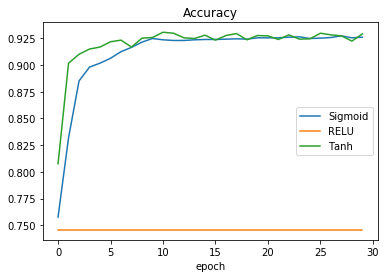

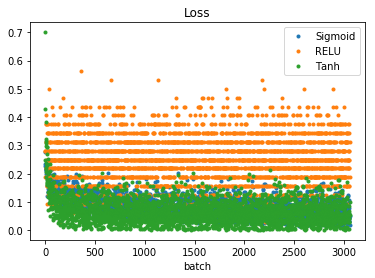

In [14]:
# Graph accuracy per activation 
l1, = plt.plot(sig_acc, label='Sigmoid')
l2, = plt.plot(relu_acc, label = 'RELU')
l3, = plt.plot(tanh_acc, label='Tanh')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(handles=[l1, l2, l3])

# Graph loss per activation
plt.figure()
l1, = plt.plot(sig_loss, '.', label='Sigmoid')
l2, = plt.plot(relu_loss, '.', label='RELU')
l3, = plt.plot(tanh_loss, '.', label='Tanh')
plt.title('Loss')
plt.xlabel('batch')
plt.legend(handles=[l1, l2, l3])

In [15]:
# Running neural network on sigmoid activation but with different optimizers  
sgd, sgd_loss, sgd_acc = neural_mod('sigmoid', 'sgd')
sgd_val = sgd.test_on_batch(X_test, y_test)
rms, rms_loss, rms_acc = neural_mod('sigmoid', 'RMSprop')
rms_val = rms.test_on_batch(X_test, y_test)
agd, agd_loss, agd_acc = neural_mod('sigmoid', 'Adagrad')
agd_val = agd.test_on_batch(X_test, y_test)
adam, adam_loss, adam_acc = neural_mod('sigmoid', 'Adam')
adam_val = adam.test_on_batch(X_test, y_test)

Train on 3248 samples, validate on 3249 samples
Epoch 1/30
3248/3248 [==============================] - 0s 129us/step - loss: 0.1642 - acc: 0.7460 - val_loss: 0.1520 - val_acc: 0.7621
Epoch 2/30
3248/3248 [==============================] - 0s 81us/step - loss: 0.1542 - acc: 0.7460 - val_loss: 0.1443 - val_acc: 0.7621
Epoch 3/30
3248/3248 [==============================] - 0s 85us/step - loss: 0.1478 - acc: 0.7460 - val_loss: 0.1380 - val_acc: 0.7621
Epoch 4/30
3248/3248 [==============================] - 0s 81us/step - loss: 0.1419 - acc: 0.7460 - val_loss: 0.1325 - val_acc: 0.7621
Epoch 5/30
3248/3248 [==============================] - 0s 67us/step - loss: 0.1373 - acc: 0.7478 - val_loss: 0.1280 - val_acc: 0.7692
Epoch 6/30
3248/3248 [==============================] - 0s 66us/step - loss: 0.1329 - acc: 0.7657 - val_loss: 0.1238 - val_acc: 0.8009
Epoch 7/30
3248/3248 [==============================] - 0s 71us/step - loss: 0.1288 - acc: 0.8156 - val_loss: 0.1198 - val_acc: 0.8658
Epoch 

3248/3248 [==============================] - 0s 83us/step - loss: 0.0346 - acc: 0.9572 - val_loss: 0.0302 - val_acc: 0.9624
Train on 3248 samples, validate on 3249 samples
Epoch 1/30
3248/3248 [==============================] - 0s 113us/step - loss: 0.1411 - acc: 0.8590 - val_loss: 0.1004 - val_acc: 0.9255
Epoch 2/30
3248/3248 [==============================] - 0s 75us/step - loss: 0.0941 - acc: 0.9172 - val_loss: 0.0798 - val_acc: 0.9314
Epoch 3/30
3248/3248 [==============================] - 0s 71us/step - loss: 0.0816 - acc: 0.9218 - val_loss: 0.0704 - val_acc: 0.9360
Epoch 4/30
3248/3248 [==============================] - 0s 91us/step - loss: 0.0753 - acc: 0.9249 - val_loss: 0.0653 - val_acc: 0.9391
Epoch 5/30
3248/3248 [==============================] - 0s 91us/step - loss: 0.0714 - acc: 0.9255 - val_loss: 0.0621 - val_acc: 0.9421
Epoch 6/30
3248/3248 [==============================] - 0s 87us/step - loss: 0.0688 - acc: 0.9283 - val_loss: 0.0599 - val_acc: 0.9391
Epoch 7/30
3248/3

Epoch 30/30
3248/3248 [==============================] - 0s 81us/step - loss: 0.0358 - acc: 0.9526 - val_loss: 0.0325 - val_acc: 0.9649


In [16]:
# Print loss and accuracy values 
print('\nSGD Optimizer')
print("Test Loss: \t{0:.4f}\nTest Accuracy: \t{1:.2f}%".format(sgd_val[0], sgd_val[1]*100))
print('RMSprop Optimizer')
print("Test Loss: \t{0:.4f}\nTest Accuracy: \t{1:.2f}%".format(rms_val[0], rms_val[1]*100))
print('Adagrad Optimizer')
print("Test Loss: \t{0:.4f}\nTest Accuracy: \t{1:.2f}%".format(agd_val[0], agd_val[1]*100))
print('Adam Optimizer')
print("Test Loss: \t{0:.4f}\nTest Accuracy: \t{1:.2f}%".format(adam_val[0], adam_val[1]*100))


SGD Optimizer
Test Loss: 	0.0701
Test Accuracy: 	93.72%
RMSprop Optimizer
Test Loss: 	0.0302
Test Accuracy: 	96.24%
Adagrad Optimizer
Test Loss: 	0.0467
Test Accuracy: 	94.89%
Adam Optimizer
Test Loss: 	0.0325
Test Accuracy: 	96.49%


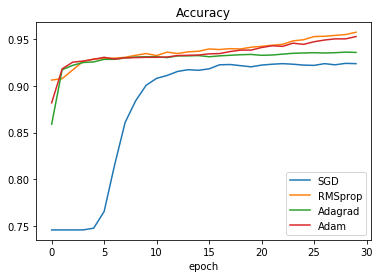

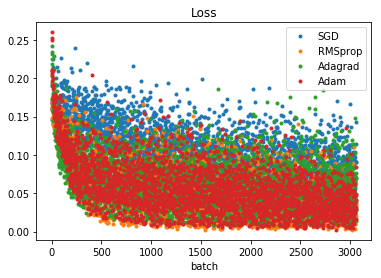

In [17]:
# Graph accuracy per optimizer
l1, = plt.plot(sgd_acc, label='SGD')
l2, = plt.plot(rms_acc, label = 'RMSprop')
l3, = plt.plot(agd_acc, label='Adagrad')
l4, = plt.plot(adam_acc, label='Adam')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(handles=[l1, l2, l3, l4])

# Graph loss per activation
plt.figure()
l1, = plt.plot(sgd_loss, '.', label='SGD')
l2, = plt.plot(rms_loss, '.', label='RMSprop')
l3, = plt.plot(agd_loss, '.', label='Adagrad')
l4, = plt.plot(adam_loss, '.', label='Adam')
plt.title('Loss')
plt.xlabel('batch')
plt.legend(handles=[l1, l2, l3, l4])